## Setup
Ensure MatplotLib plots figures inline and and prepare the function to save the fig on the fly

In [1]:
%matplotlib inline
import matplotlib as mpl
import os

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
ROOT_DIR = '.'
PROJECT_ID = 'housing'
IMG_PATH = os.path.join(ROOT_DIR, 'images', PROJECT_ID)
os.makedirs(IMG_PATH, exist_ok=True)

In [4]:
def save_img(fig_id, fig_extension='png', resolution=300, tight_layout=True):
    file_name = os.path.join(IMG_PATH,fig_id+'.'+fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fname=file_name, dpi=resolution, format =fig_extension)

## Get the data and have a quick look

### Download the data

In [5]:
import os
import tarfile
import urllib.request
import pandas as pd

In [6]:
SOURCE_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
SOURCE_URL = SOURCE_ROOT + "datasets/housing/housing.tgz"
FILE_PATH = os.path.join("datasets","housing")

In [7]:
def fetch_data(source_path=SOURCE_URL,file_path=FILE_PATH):
    if not os.path.isdir(file_path):
        os.makedirs(file_path)
        
    file_path_detail = os.path.join(file_path,'housing.tgz')
    urllib.request.urlretrieve(source_path, file_path_detail)
    tar_file = tarfile.open(file_path_detail)
    tar_file.extractall(path=file_path)
    tar_file.close()
    

In [8]:
fetch_data()

In [9]:
def read_file(file_path=FILE_PATH):
    housing_csv = os.path.join(file_path, "housing.csv")
    return pd.read_csv(housing_csv)

In [10]:
data = read_file()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Quick looking at the data

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

Saving figure attribute_histogram_plots


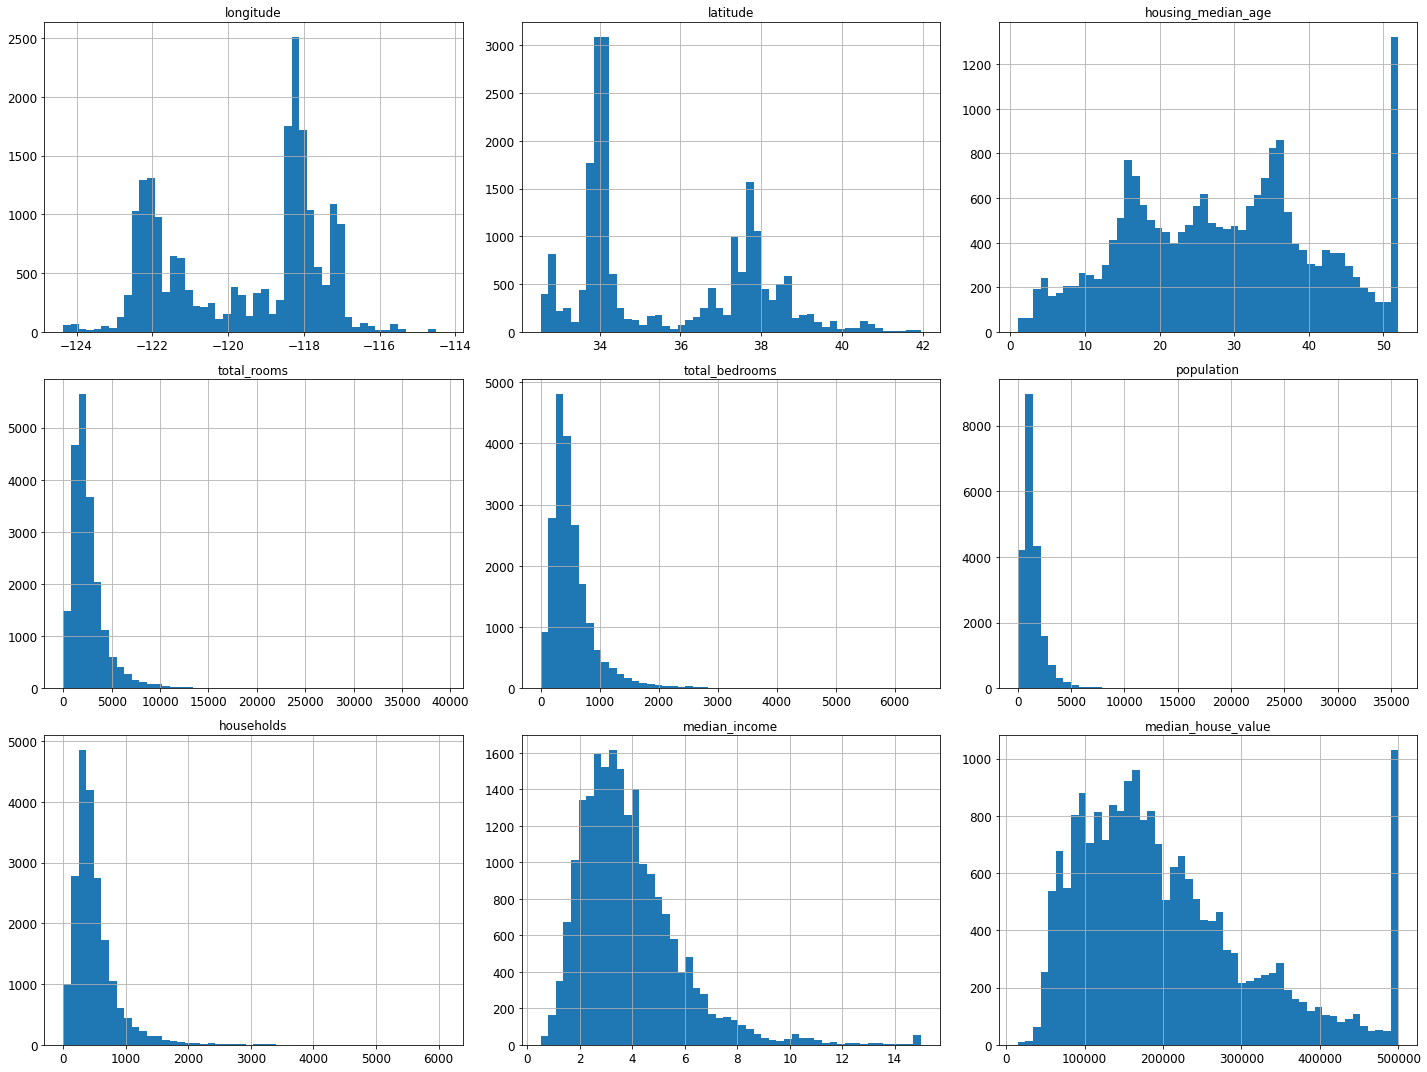

In [12]:
data.hist(bins=50,figsize=(20,15))
save_img('attribute_histogram_plots')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Create a Test Set
#### method1: random split

In [16]:
# to make each time's output identical
# import random
# random.seed(42)
np.random.seed(42)

In [17]:
import numpy as np
def train_test_split(data, test_ratio):
    test_set_size= int(len(data)* test_ratio)
    shuffled_array=np.random.permutation(len(data))
    test_indices = shuffled_array[:test_set_size]
    train_indices = shuffled_array[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [18]:
train_set, test_set = train_test_split(data, 0.2)
print (len(train_set))
print (len(test_set))
print(len(data)*0.2)

16512
4128
4128.0


#### method2: Hashed_id * test_rate
compute a has of each instance's identifier and put that instance in the test set if the hash is lower or equal to 20% of the maximum hash value

In [19]:
from zlib import crc32


In [20]:
# 0xffffffff = 2**32 -1 in hex; 2**32 the maximum number in 32bit operation syster
def test_train_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [21]:
def split_train_test_by_id(data, id_column, test_ratio):
    ids = data[id_column]
    in_test_set = ids.apply(lambda _id: test_train_check(_id,test_ratio))
    return  data.loc[~in_test_set], data.loc[in_test_set]

In [22]:
data_with_id = data.reset_index()
data_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
train_set, test_set = split_train_test_by_id(data_with_id, 'index',0.2)
print (len(train_set))
print (len(test_set))
print(len(data)*0.2)

16512
4128
4128.0


#### method3: sklearn

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print (len(train_set))
print (len(test_set))
print(len(data)*0.2)

16512
4128
4128.0


#### method4: stratified split
split according to critical column

<AxesSubplot: >

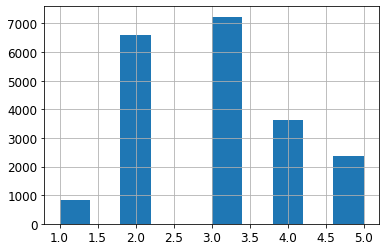

In [26]:
# 1,transform median_income to 5 categories
# 2.using stratified split 
data['income_cat'] = pd.cut(x=data['median_income'], bins=[0,1.5,3.,4.5,6.,np.inf], labels=[1,2,3,4,5])
data['income_cat'].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_idx]
    strat_test_set = data.loc[test_idx]
    


In [29]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [30]:
data['income_cat'].value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [31]:
def income_cat_percetage(item):
    return item.value_counts()/len(item)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
overall_compare = pd.DataFrame(data={
    "Overall": income_cat_percetage(data['income_cat']),
    "Stratified": income_cat_percetage(strat_test_set['income_cat']),
    "Random": income_cat_percetage(test_set['income_cat'])
}).sort_index()

overall_compare['Rand. %error'] = (overall_compare['Random']/overall_compare['Overall'] -1)*100
overall_compare['Strat. %error'] = (overall_compare['Stratified']/overall_compare['Overall'] -1)*100

In [32]:
overall_compare

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [33]:
for _set in (strat_train_set, strat_test_set):
    _set.drop("income_cat", inplace=True, axis=1)

## Explore the data

### Backup the data before explore

In [34]:
data = strat_train_set.copy()

### Visualize geographic data

Saving figure Normal_visulization_plot


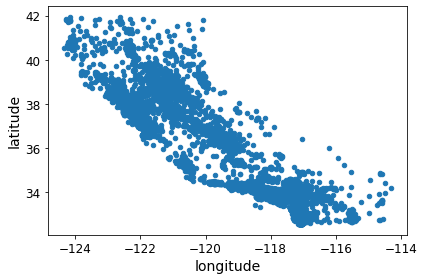

In [35]:
data.plot(kind='scatter', x='longitude', y='latitude')
save_img("Normal_visulization_plot")

Saving figure Better_geo_visulization


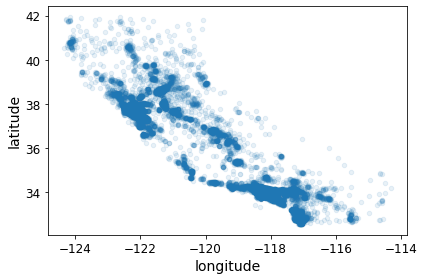

In [36]:
# Adding alpha to make density data more clear
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
save_img('Better_geo_visulization')

Saving figure california_housing_prices_plot


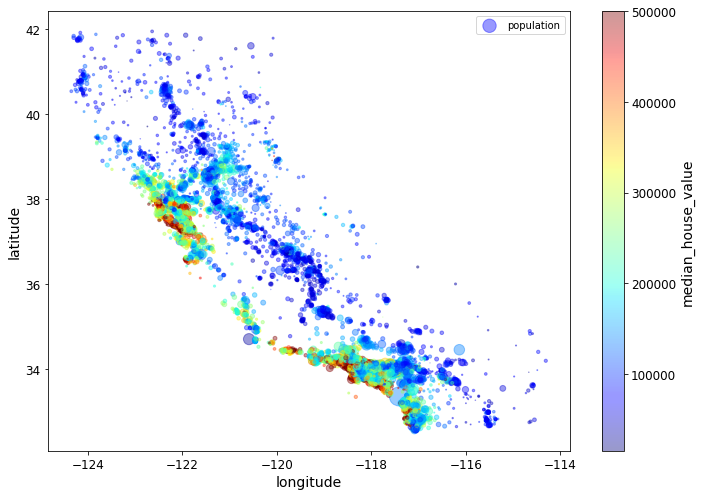

In [37]:
# Adding population, and  median_house_value as shape and color to check the potential relationship
data.plot(kind='scatter', x='longitude', y='latitude', s=data['population']/100, c='median_house_value',
         cmap= plt.get_cmap('jet'), alpha=0.4, figsize=(10,7),label="population", colorbar= True, sharex= False)
plt.legend
save_img("california_housing_prices_plot")
plt.show()

In [38]:
# download the california map and express the plot in map
IMG_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
IMG_NAME = "california.png"
print(f"Downloading {IMG_NAME}")
URL =  IMG_ROOT+"images/end_to_end_project/" + IMG_NAME
urllib.request.urlretrieve(URL, os.path.join(IMG_PATH, IMG_NAME))

('.\\images\\housing\\california.png',
 <http.client.HTTPMessage at 0x1e91f306eb0>)

Saving figure california_housing_pricing_plot


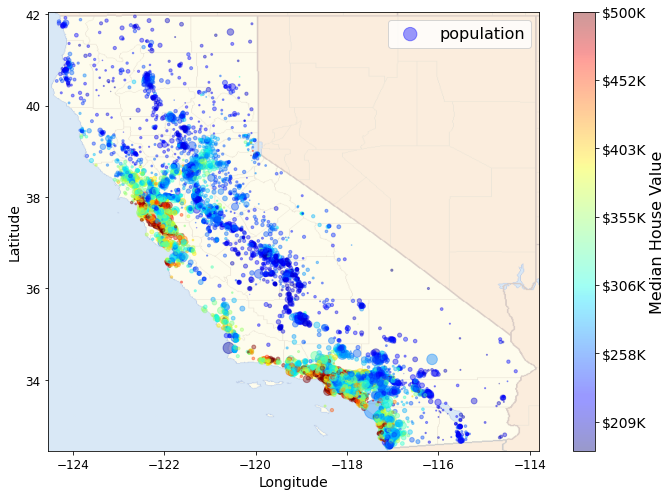

In [39]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(IMG_PATH, IMG_NAME))

ax = data.plot(kind='scatter', x='longitude', y='latitude', s=data['population']/100, c='median_house_value',
         cmap= plt.get_cmap('jet'), alpha=0.4, figsize=(10,7),label="population", colorbar= False)

# extent corresponds to the longtitude and lantitude area in the data
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.4,
          cmap= plt.get_cmap('jet'))

plt.xlabel("Longitude", fontsize = 14)
plt.ylabel("Latitude", fontsize = 14)

# customerize median price colorbar
price = data.median_house_value
axis_ticks = np.linspace(price.min(), price.max(), 11)
# set ticks
cbar = plt.colorbar(ticks = axis_ticks/price.max())
# change the description of ticks
cbar.set_ticklabels(["$%dK"%round(v/1000) for v in axis_ticks], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

ax.legend(fontsize=16)
save_img("california_housing_pricing_plot")
plt.show()

In [40]:
data[['longitude', 'latitude']].describe()

,longitude,latitude
count,16512.000000,16512.000000
mean,-119.575635,35.639314
std,2.001828,2.137963
min,-124.350000,32.540000
25%,-121.800000,33.940000
50%,-118.510000,34.260000
75%,-118.010000,37.720000
max,-114.310000,41.950000


### Looking for correlation

In [41]:
corr_matrix = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

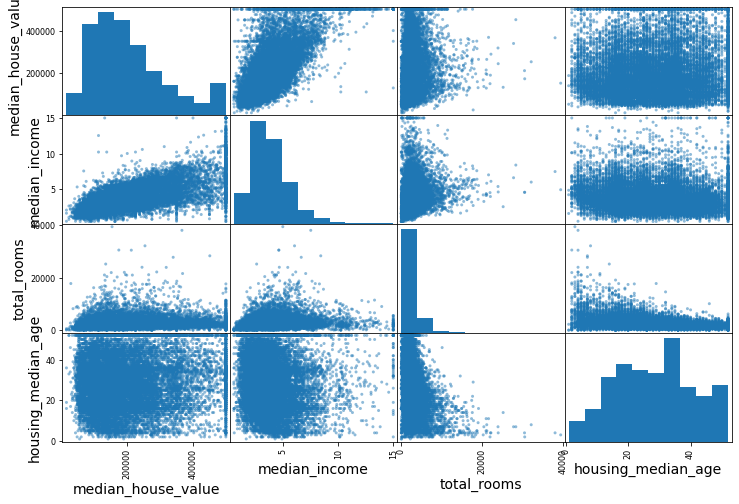

Saving figure Scatter_matrix_plot


<Figure size 432x288 with 0 Axes>

In [42]:
# using pandas scatter_matrix() to check the correlation between attributes
columns=['median_house_value','median_income','total_rooms',  'housing_median_age', ]
pd.plotting.scatter_matrix(data[columns], figsize=(12,8))
plt.show()
save_img('Scatter_matrix_plot')

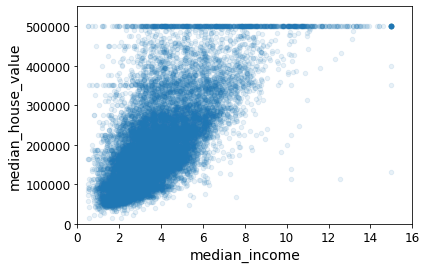

In [43]:
data.plot(kind='scatter', x= 'median_income', y='median_house_value', alpha =0.1)
plt.axis([0,16,0,550000])
# there is a horizontal line around 500k, 450k, 350k and 280K, we need to remove them
plt.show()

In [44]:
data[['median_income','median_house_value']].describe()

,median_income,median_house_value
count,16512.000000,16512.000000
mean,3.875884,207005.322372
std,1.904931,115701.297250
min,0.499900,14999.000000
25%,2.566950,119800.000000
50%,3.541550,179500.000000
75%,4.745325,263900.000000
max,15.000100,500001.000000


### Experimenting with attribute combinations
start off on the right foot and quickly gain insights

In [45]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_households'] = data['population']/data['households']


In [46]:
corr_matrix= data[data._get_numeric_data().columns].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687151
rooms_per_household          0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
population_per_households   -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
Name: median_house_value, dtype: float64

## Prepare the data for ML
This part includes deal with numerical data cleaning(missing values), categorical data convert to numbers(ordinal or one-hot encoding), feature scaling, tranformation pipelines

In [47]:
# seperate target values from the other columns
data = strat_train_set.drop("median_house_value", axis =1)
data_label = strat_train_set['median_house_value'].copy()

### Data cleaning
#### Missing data

In [48]:
# find rows with missing values
incomplete_data_sample = data[data.isnull().any(axis=1)].head()
incomplete_data_sample 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [49]:
# option1: drop na
incomplete_data_sample.dropna(subset='total_bedrooms')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [50]:
# option2: drop columns
incomplete_data_sample.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [51]:
#option3: fill with median
bedrooms_median = data['total_bedrooms'].median()
bedrooms_median

433.0

In [52]:
incomplete_data_sample['total_bedrooms'].fillna(bedrooms_median,inplace = True)
incomplete_data_sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [53]:
# using sklearn to fill missing data with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_num = data._get_numeric_data()
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [55]:
data_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [56]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index = data_num.index)

In [57]:
# check whether imputer work properly
data_tr.loc[incomplete_data_sample.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [58]:
imputer.strategy

'median'

### Catigorical data
There are 2 ways we try here, ordinal encoder and one-hot encoder.

In [59]:
data_cat = data[["ocean_proximity"]]
data_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [60]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe_encoded = oe.fit(data_cat).fit_transform(data_cat)
oe_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [61]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [62]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_encoded = ohe.fit_transform(data_cat)
ohe_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [63]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:
columns = ['total_rooms', 'total_bedrooms', 'population', 'households']
rooms_ix, bedrooms_ix, population_ix, households_ix = [data.columns.get_loc(v) for v in columns]

In [66]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_household = True):
        self.add_bedrooms_per_household = add_bedrooms_per_household
        
    def fit(self, X, y=None):
        return self #nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_household:
            bedrooms_per_household = X[:, bedrooms_ix] / X[:, households_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else: 
            return np.c_[X, rooms_per_household, population_per_household]
        
        

In [67]:
addr_adder = CombinedAttributesAdder(add_bedrooms_per_household = False)
data_extra_columns = addr_adder.transform(data.values)
data_extra_columns

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [68]:
data_extra_columns = pd.DataFrame(data_extra_columns, 
                                  columns = list(data.columns) +
                                  ['rooms_per_household'] + ['population_per_household'],
                                  index = data.index
                                 )
data_extra_columns.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Transformation Pipelines
using pipeline to transform numerical and categorical data seperatly and then combine them together by ColumnTransformer for sklearn 0.2 and later. The other way is to use customeized DataFrameSelector and FeatureUnion to fulfill it 

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
# For numerical
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])
data_num_tr = num_pipeline.fit_transform(data_num)


In [71]:
# For combination
from sklearn.compose import ColumnTransformer

In [72]:
num = list(data_num)
cat = ['ocean_proximity']

full_pipeline =ColumnTransformer([
    ("num", num_pipeline, num),
    ('cat', OneHotEncoder(), cat)
])

data_prepared = full_pipeline.fit_transform(data)

In [73]:
data_prepared.shape

(16512, 16)

In [74]:
# using Customerize transformer DataFrameSelector and FeatureUnion to do it
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_selector):
        self.attribute_selector = attribute_selector
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_selector].values
    


In [75]:
from sklearn.pipeline import FeatureUnion

In [76]:
num_pipeline = Pipeline([
    ("num", DataFrameSelector(num)),
    ("imputer", SimpleImputer(strategy = "median")),
    ("attr_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("cat", DataFrameSelector(cat)),
    ("onehot_encoder", OneHotEncoder(sparse = False))
])

full_pipeline2 = FeatureUnion([
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])

data_prepared2 = full_pipeline2.fit_transform(data)

In [77]:
data_prepared2

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
np.allclose(data_prepared, data_prepared2)


True

In [79]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

## Select and train a model

In [80]:
# linear regression model
# Decision tree model
# Random forrest model

# linear regression model -- underfitting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr= LinearRegression()
lr.fit(data_prepared, data_label)
y_hat = lr.predict(data_prepared)
np.sqrt(mean_squared_error(y_hat, data_label))

68911.0923109651

In [81]:
# try it out on a few instances from the training set
some_data = data.iloc[:5]
some_label = data_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"predicted ones: {lr.predict(some_data_prepared)}")
print(f"real ones: {list(some_label)}")



predicted ones: [ 88256.36801237 304199.78068358 154086.24780718 183870.82699463
 247265.32060456]
real ones: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [82]:
# decision tree -overfitting
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(data_prepared, data_label)
y_hat = dtr.predict(data_prepared)
np.sqrt(mean_squared_error(data_label,y_hat))

0.0

### Better evaluation using cross-validation

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
scores = cross_val_score(dtr, data_prepared, data_label, 
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_score = np.sqrt(-scores)

In [85]:
def show_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard deviation", scores.std())
    

In [86]:
show_scores(tree_rmse_score)

Scores [72178.61753634 70821.30622501 70122.80867932 72432.9344156
 67944.60755631 74650.70799432 75007.06426365 72482.84789889
 70271.52834527 74580.22868537]
Mean 72049.26516000547
Standard deviation 2179.483076209952


In [87]:
scores = cross_val_score(lr, data_prepared, data_label,
                        scoring='neg_mean_squared_error', cv=10)
lr_scores = np.sqrt(-scores)
show_scores(lr_scores)
pd.Series(lr_scores).describe()

Scores [72338.40387601 64530.64473729 68119.0474831  69120.53858892
 67148.70307804 73040.52281674 71766.52137855 69342.38602167
 66927.59027718 70505.4339031 ]
Mean 69283.97921605909
Standard deviation 2553.2224499275558


count       10.000000
mean     69283.979216
std       2691.332772
min      64530.644737
25%      67391.289179
50%      69231.462305
75%      71451.249510
max      73040.522817
dtype: float64

In [88]:
# Random forest
from sklearn.ensemble import RandomForestRegressor


In [89]:
rf = RandomForestRegressor()
rf.fit(data_prepared, data_label)
y_hat = rf.predict(data_prepared)
print('RMSE of random forest:', np.sqrt(mean_squared_error(data_label, y_hat)))

RMSE of random forest: 18879.92560418937


In [90]:
scores = cross_val_score(rf, data_prepared, data_label,
                         scoring='neg_mean_squared_error', cv=10)
rf_score = np.sqrt(-scores)
show_scores(rf_score)

Scores [51456.70220167 49786.90903444 47059.73947785 52159.07021995
 47701.00863385 51252.82350089 52989.72012827 49689.62164888
 48154.87201951 54663.18343482]
Mean 50491.365030013585
Standard deviation 2325.922945691818


In [91]:
# svm
from sklearn.svm import SVR

In [92]:
svr = SVR(kernel ='linear')
svr.fit(data_prepared, data_label)
y_hat = svr.predict(data_prepared)
mse_svr = mean_squared_error(data_label, y_hat)
np.sqrt(mse_svr)

111571.9674966407

## Tuning the model
GridSearchCV vs Randomized search

### Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid =[
    {"n_estimators": [3, 10, 30, 90], "max_features":[2, 4, 6, 8, 16]},
    {"bootstrap": [False], "n_estimators": [3,10, 30], "max_features":[2,3,4,]}
]

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(data_prepared, data_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 16],
                          'n_estimators': [3, 10, 30, 90]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [95]:
# 
grid_search.best_params_

{'max_features': 6, 'n_estimators': 90}

In [96]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=90)

In [97]:
# print all of the evaluation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score),"--", params)

64942.11086746892 -- {'max_features': 2, 'n_estimators': 3}
55477.09246764933 -- {'max_features': 2, 'n_estimators': 10}
52588.321778083104 -- {'max_features': 2, 'n_estimators': 30}
51972.56010403844 -- {'max_features': 2, 'n_estimators': 90}
61137.98837018934 -- {'max_features': 4, 'n_estimators': 3}
52451.8390103008 -- {'max_features': 4, 'n_estimators': 10}
50320.80333149961 -- {'max_features': 4, 'n_estimators': 30}
49470.63436151616 -- {'max_features': 4, 'n_estimators': 90}
58997.79965404832 -- {'max_features': 6, 'n_estimators': 3}
51750.57938227059 -- {'max_features': 6, 'n_estimators': 10}
49961.75740351994 -- {'max_features': 6, 'n_estimators': 30}
49173.44551426405 -- {'max_features': 6, 'n_estimators': 90}
59320.79974964848 -- {'max_features': 8, 'n_estimators': 3}
52014.13094926059 -- {'max_features': 8, 'n_estimators': 10}
50045.18610072755 -- {'max_features': 8, 'n_estimators': 30}
49176.08920845402 -- {'max_features': 8, 'n_estimators': 90}
59285.29260409424 -- {'max_f

In [98]:
pd.DataFrame(cvres)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043608,0.000815,0.002783,3.927626e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.198695e+09,-4.373996e+09,...,-4.217478e+09,2.003462e+08,29,-1.119491e+09,-1.183922e+09,-1.064934e+09,-1.071310e+09,-1.161574e+09,-1.120246e+09,4.736542e+07
1,0.140399,0.003006,0.006202,3.975503e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.151375e+09,-2.930238e+09,...,-3.077708e+09,1.795152e+08,21,-6.093182e+08,-5.830315e+08,-5.647856e+08,-5.964120e+08,-5.824671e+08,-5.872029e+08,1.494161e+07
2,0.418606,0.003926,0.018397,1.014221e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.798841e+09,-2.740577e+09,...,-2.765532e+09,8.857473e+07,18,-4.284286e+08,-4.465707e+08,-4.408995e+08,-4.302606e+08,-4.227997e+08,-4.337918e+08,8.670381e+06
3,1.246164,0.005048,0.052619,4.689769e-04,2,90,NaN,"{'max_features': 2, 'n_estimators': 90}",-2.678900e+09,-2.589973e+09,...,-2.701147e+09,1.052176e+08,13,-3.831611e+08,-3.869671e+08,-3.924624e+08,-3.820997e+08,-3.857697e+08,-3.860920e+08,3.632627e+06
4,0.065398,0.001625,0.002402,4.900376e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.639825e+09,-3.658122e+09,...,-3.737854e+09,7.767972e+07,27,-9.485785e+08,-9.868319e+08,-9.526434e+08,-9.152360e+08,-9.282068e+08,-9.462993e+08,2.441558e+07
5,0.216598,0.002059,0.006202,4.000187e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.831214e+09,-2.569613e+09,...,-2.751195e+09,9.975382e+07,17,-5.215089e+08,-5.221920e+08,-5.213152e+08,-5.297047e+08,-5.153762e+08,-5.220194e+08,4.560318e+06
6,0.641999,0.007099,0.018202,4.001618e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.543484e+09,-2.456997e+09,...,-2.532183e+09,9.203348e+07,8,-3.912683e+08,-3.947237e+08,-4.007774e+08,-3.896953e+08,-3.854046e+08,-3.923739e+08,5.159636e+06
7,1.916800,0.008233,0.053202,1.470133e-03,4,90,NaN,"{'max_features': 4, 'n_estimators': 90}",-2.468243e+09,-2.364156e+09,...,-2.447344e+09,9.242456e+07,4,-3.512458e+08,-3.538527e+08,-3.495143e+08,-3.512974e+08,-3.418306e+08,-3.495482e+08,4.099566e+06
8,0.088398,0.001624,0.002002,4.909339e-07,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.628512e+09,-3.286810e+09,...,-3.480740e+09,1.111823e+08,23,-9.387671e+08,-9.523319e+08,-9.849751e+08,-9.129028e+08,-9.016456e+08,-9.381245e+08,2.954347e+07
9,0.292198,0.001720,0.006002,3.234067e-07,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.773349e+09,-2.597994e+09,...,-2.678122e+09,6.139645e+07,12,-5.133170e+08,-5.024250e+08,-4.987233e+08,-4.724871e+08,-4.945125e+08,-4.962930e+08,1.344034e+07


### Randomized search

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [100]:
param_random = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=10)
  
}

random_search = RandomizedSearchCV(rf, param_random, cv=5,
                                  scoring="neg_mean_squared_error",
                                  n_iter=10, random_state= 42)
random_search.fit(data_prepared, data_label)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E92AC0D580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E92AC1AB80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [101]:
cvres= random_search.cv_results_
for mean_score, param in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), "--", param)

48904.574753590656 -- {'max_features': 7, 'n_estimators': 180}
49180.16506088606 -- {'max_features': 8, 'n_estimators': 189}
49113.43225822677 -- {'max_features': 5, 'n_estimators': 103}
50263.22306785972 -- {'max_features': 3, 'n_estimators': 75}
49090.232059730515 -- {'max_features': 8, 'n_estimators': 117}
49338.56190097285 -- {'max_features': 4, 'n_estimators': 104}
49117.82817977461 -- {'max_features': 8, 'n_estimators': 131}
49433.36384971273 -- {'max_features': 6, 'n_estimators': 53}
51866.20274289935 -- {'max_features': 2, 'n_estimators': 88}
48983.307533643776 -- {'max_features': 6, 'n_estimators': 130}


In [102]:
random_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180)

### Analyze the best models and their errors

In [103]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [104]:
extra_columns =['rooms_per_household', 'population_per_household', 'bedrooms_per_household']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attrs = num + extra_columns + cat_one_hot_attribs
sorted(zip(feature_importance, attrs), reverse=True)

[(0.34024730757491206, 'median_income'),
 (0.15964505489134678, 'INLAND'),
 (0.10940680018994886, 'population_per_household'),
 (0.08102722479696763, 'rooms_per_household'),
 (0.08072842099326077, 'longitude'),
 (0.07240710338056393, 'latitude'),
 (0.041549937862748895, 'housing_median_age'),
 (0.025334651819257835, 'bedrooms_per_household'),
 (0.019143832928895325, 'total_rooms'),
 (0.017845662427146716, 'population'),
 (0.016487453489844216, 'total_bedrooms'),
 (0.015812813002831914, 'households'),
 (0.013023661001381118, '<1H OCEAN'),
 (0.004421354115171461, 'NEAR OCEAN'),
 (0.002853890029392764, 'NEAR BAY'),
 (6.483149632956462e-05, 'ISLAND')]

### Evaluate on the test set

In [105]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [106]:
# only need to transform
X_test_prepared = full_pipeline.transform(X_test)

In [107]:
final_model= random_search.best_estimator_
y_hat=final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [108]:
final_rmse

47172.414806923596

In [109]:
# calculate the 95% confidence interval
from scipy import stats 

In [110]:
confidence = 0.95
squared_errors = (y_hat - y_test) **2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                loc = squared_errors.mean(),
                scale = stats.sem(squared_errors)))

array([45179.71707062, 49084.28060848])

## Others

### SVM


In [111]:
from sklearn.svm import SVR


In [122]:
svr = SVR()
para_grid = [
    {'kernel':["linear"], 'C':[3,10, 30, 100, 300, 1000, 3000], },
    {'kernel':["rbf"], 'C':[1, 3,10, 30, 100, 300], 'gamma':[0.01, 0.03, 0.1, 0.3, 1, 3]}
]
svm_grid = GridSearchCV(svr, para_grid, cv =5,
                        scoring= 'neg_mean_squared_error',
                       return_train_score = True)
svm_grid_results = svm_grid.fit(data_prepared, data_label)
svm_grid_results.best_estimator_

SVR(C=1000, kernel='linear')

In [124]:
np.sqrt(-svm_grid_results.best_score_)

70676.06984794055

In [126]:
from scipy.stats import reciprocal,expon
from sklearn.model_selection import RandomizedSearchCV

The reciprocal distribution is useful when you really don't know much about the correct value of the hyperparameter, not even its approximate scale. The best value may be 0.00001, or 0.01, 100 or 100,000, you just don't know. Before you can fine-tune this hyperparameter, you have to discover at least its approximate scale. Suppose you just tried picking random values for this hyperparameter, between 0 and 100,000, using a uniform distribution: it would be highly unlikely that any value smaller than 1.0 would be tried, let alone any value smaller than 0.01. But perhaps a very small hyperparameter is what will work best. So instead of randomly picking a hyperparameter value uniformly between 0 and 100,000, a better option is to pick its scale 


We used the reciprocal() distribution for C, meaning we did not have a clue what the optimal scale of C was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

In [280]:
# random cv
para_grid_random = [{'kernel':['linear', 'rbf'],
                     'C': reciporacal(20, 200_000),
                    'gamma': expon(scale=1.0)}]

svm_reg = SVR()
random_search = RandomizedSearchCV(svm_reg, para_grid_random,
                                   n_iter=50, cv=5,
                                  scoring= "neg_root_mean_squred_error"
                                  verbose=2, random_state=42)
random_search.fit(data_prepared, data_label)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [281]:
svr_random_rmse = -random_search.best_score_
svr_random_rmse

1.7320508075688774

In [ ]:
random_search.best_params_

In [131]:
np.random.rand(42)
S = expon(scale=1.0).rvs(100_000) #rvs:random variates. get 100,000 samples
((S >0.105) & (S< 2.29)).sum()/100_000

0.79816

Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution,
we can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

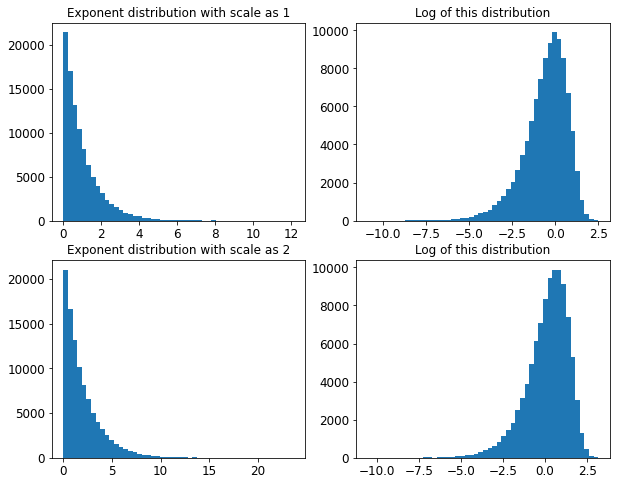

In [144]:

plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title("Exponent distribution with scale as 1")
plt.hist(S,bins=50)
plt.subplot(222)
plt.title("Log of this distribution")
plt.hist(np.log(S),bins=50)
plt.subplot(223)
plt.title("Exponent distribution with scale as 2")
S2 = expon(scale=2).rvs(100_000)
plt.hist(S2,bins=50)
plt.subplot(224)
plt.title("Log of this distribution")
plt.hist(np.log(S2),bins=50)
plt.show()

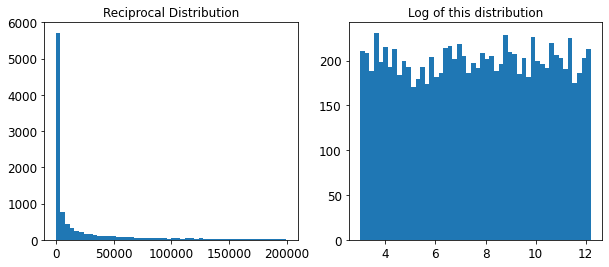

In [149]:
# for using reciprocal distribution on C 
plt.figure(figsize =(10, 4))
plt.subplot(121)
plt.title("Reciprocal Distribution")
S = reciprocal(20,200_000).rvs(10_000)
plt.hist(S, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(S), bins=50)
plt.show()

### Add a transfomer to select only the most important attributes

In [170]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr),-k)[-k:])

array([0, 2, 3], dtype=int64)

In [ ]:
np